# **Penguins classification study** 
This study has the objective of classifying bay spices a penguin dataset using tree machine learn techniques, Decision trees, Random fores and support vector machines (SVM). 

## **About the dataset**
this dataset was collected by Dr. Kristen Gorman and the Palmer Station and made available in [kaggle](https://www.kaggle.com/datasets/larsen0966/penguins).

## **obijectives**
the go of this notebook is to learn the process of transforming the data and training classifications models, fore this reason this may not be the optimal way of doing thins, but is a learning processes. 
whit this objective in mind we will use tree models: 

Decision tree
random forests 
Support vector machines (SVM)

Those models wore chosen because they are more used and there is more resources to learn from. 

## importing modules 

In [1]:
import pandas as pd 
import numpy as np 
import category_encoders as  ce 
import matplotlib.pyplot as plt

### Loading data

In [2]:
path = 'archive/penguins_lter.csv'
df = pd.read_csv(path)
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [4]:
# Getting unique values form each column 
for col in df: 
    print('{} : {}'.format(col, len(df[col].unique())))

studyName : 3
Sample Number : 152
Species : 3
Region : 1
Island : 3
Stage : 1
Individual ID : 190
Clutch Completion : 2
Date Egg : 50
Culmen Length (mm) : 165
Culmen Depth (mm) : 81
Flipper Length (mm) : 56
Body Mass (g) : 95
Sex : 4
Delta 15 N (o/oo) : 331
Delta 13 C (o/oo) : 332
Comments : 8


Considering that Stage and Region only heave 1 unique value, these columns will not add any information to the model. On the other hand, the columns 'Sample Number','studyName','Comments' are identifications and don't bring new information to the model. 
with that in mind, those 5 columns will not be used in this study 

In [5]:
df = df.drop(['Stage','Region','Individual ID','Sample Number','studyName','Comments'], axis=1)
df.head()

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426


## Train test split 

To train the model we need to split our data in train data and test data. To do that, we will use the tool of sklerne.

In [6]:
from sklearn.model_selection import train_test_split

As our go is to predict pinging species, we will considered the column Species as the Y variable and the rest of the dataset will be called X 

In [7]:
x = df.drop(['Species'], axis=1)
y = df['Species']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(
x,y,test_size=0.33,random_state=42)

In [9]:
x_test.reset_index(drop=True)
y_test.reset_index(drop=True)
x_test.head()

,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
194,Dream,Yes,11/14/08,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
157,Dream,Yes,11/21/07,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
225,Biscoe,Yes,11/18/07,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
208,Dream,Yes,11/21/09,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
318,Biscoe,Yes,11/18/09,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971


In [10]:
x_train.reset_index(drop=True)
y_train.reset_index(drop=True)
x_train.head()

,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
15,Torgersen,Yes,11/16/07,36.6,17.8,185.0,3700.0,FEMALE,NaN,NaN
6,Torgersen,No,11/15/07,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799
244,Biscoe,Yes,11/29/07,42.9,13.1,215.0,5000.0,FEMALE,7.68528,-25.39181
222,Biscoe,Yes,11/27/07,48.7,14.1,210.0,4450.0,FEMALE,8.14705,-25.46172
93,Dream,Yes,11/5/08,39.6,18.1,186.0,4450.0,MALE,8.49915,-26.42406


In [11]:
y_test

194    Chinstrap penguin (Pygoscelis antarctica)
157    Chinstrap penguin (Pygoscelis antarctica)
225            Gentoo penguin (Pygoscelis papua)
208    Chinstrap penguin (Pygoscelis antarctica)
318            Gentoo penguin (Pygoscelis papua)
                         ...                    
126          Adelie Penguin (Pygoscelis adeliae)
282            Gentoo penguin (Pygoscelis papua)
59           Adelie Penguin (Pygoscelis adeliae)
111          Adelie Penguin (Pygoscelis adeliae)
197    Chinstrap penguin (Pygoscelis antarctica)
Name: Species, Length: 114, dtype: object

In [12]:
y_train

15           Adelie Penguin (Pygoscelis adeliae)
6            Adelie Penguin (Pygoscelis adeliae)
244            Gentoo penguin (Pygoscelis papua)
222            Gentoo penguin (Pygoscelis papua)
93           Adelie Penguin (Pygoscelis adeliae)
                         ...                    
188    Chinstrap penguin (Pygoscelis antarctica)
71           Adelie Penguin (Pygoscelis adeliae)
106          Adelie Penguin (Pygoscelis adeliae)
270            Gentoo penguin (Pygoscelis papua)
102          Adelie Penguin (Pygoscelis adeliae)
Name: Species, Length: 230, dtype: object

entendendo melhor os dados de treino 

In [13]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 15 to 102
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Island               230 non-null    object 
 1   Clutch Completion    230 non-null    object 
 2   Date Egg             230 non-null    object 
 3   Culmen Length (mm)   229 non-null    float64
 4   Culmen Depth (mm)    229 non-null    float64
 5   Flipper Length (mm)  229 non-null    float64
 6   Body Mass (g)        229 non-null    float64
 7   Sex                  222 non-null    object 
 8   Delta 15 N (o/oo)    220 non-null    float64
 9   Delta 13 C (o/oo)    221 non-null    float64
dtypes: float64(6), object(4)
memory usage: 19.8+ KB


# Transforming the data 
To input the data in the module we can't have string variables. that forces us to transform this data in binary versions of them selves. in the cases of sex e Clutch Completion that only heave tow values we can use np.where to transform. <br>
in the other hand, fore columns like island we will need to use a method cal one hot encoder that breach one column in to other columns that represents the unique values inside of the original column. 

In [14]:
# defying a function to clean the data 
def tratamento(df):
    #https://www.youtube.com/watch?v=CGMhil6obDA
    encoder = ce.OneHotEncoder(cols = 'Island',use_cat_names=True)
    df = encoder.fit_transform(df)
    df['Clutch Completion'] = np.where(df['Clutch Completion']== 'Yes',1,0)
    df['Sex'] = np.where(df['Sex']== 'FEMALE',1,0)
    df = df.drop(columns=['Date Egg'],axis=1)
    df = df.fillna(0)
    
    return df 


In [15]:
x_train_tra =tratamento(x_train)

In [16]:
#importing and creating the model 
from sklearn import tree 
clf = tree.DecisionTreeClassifier()

In [17]:
# fitting the model
clf = clf.fit(x_train_tra,y_train)

In [18]:
clf.feature_importances_

array([0.        , 0.01225432, 0.        , 0.        , 0.34947029,
       0.0791654 , 0.50859381, 0.        , 0.        , 0.02982533,
       0.02069085])

In [19]:
x_train_tra.head()

,Island_Torgersen,Island_Biscoe,Island_Dream,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
15,1,0,0,1,36.6,17.8,185.0,3700.0,1,0.00000,0.00000
6,1,0,0,0,38.9,17.8,181.0,3625.0,1,9.18718,-25.21799
244,0,1,0,1,42.9,13.1,215.0,5000.0,1,7.68528,-25.39181
222,0,1,0,1,48.7,14.1,210.0,4450.0,1,8.14705,-25.46172
93,0,0,1,1,39.6,18.1,186.0,4450.0,0,8.49915,-26.42406


## understanding the model 
with the model treind now we need to visualize how the model is taking the decisions.

In [20]:
# here we can see every decision of the model in a text form. 
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_6 <= 206.50
|   |--- feature_4 <= 44.75
|   |   |--- feature_10 <= -25.01
|   |   |   |--- class: Adelie Penguin (Pygoscelis adeliae)
|   |   |--- feature_10 >  -25.01
|   |   |   |--- feature_4 <= 40.85
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- class: Adelie Penguin (Pygoscelis adeliae)
|   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |--- class: Gentoo penguin (Pygoscelis papua)
|   |   |   |--- feature_4 >  40.85
|   |   |   |   |--- feature_9 <= 9.30
|   |   |   |   |   |--- feature_5 <= 17.10
|   |   |   |   |   |   |--- class: Chinstrap penguin (Pygoscelis antarctica)
|   |   |   |   |   |--- feature_5 >  17.10
|   |   |   |   |   |   |--- class: Adelie Penguin (Pygoscelis adeliae)
|   |   |   |   |--- feature_9 >  9.30
|   |   |   |   |   |--- class: Chinstrap penguin (Pygoscelis antarctica)
|   |--- feature_4 >  44.75
|   |   |--- class: Chinstrap penguin (Pygoscelis antarctica)
|--- feature_6 >  206.50
|   |--- feature_5 <= 17.65
| 

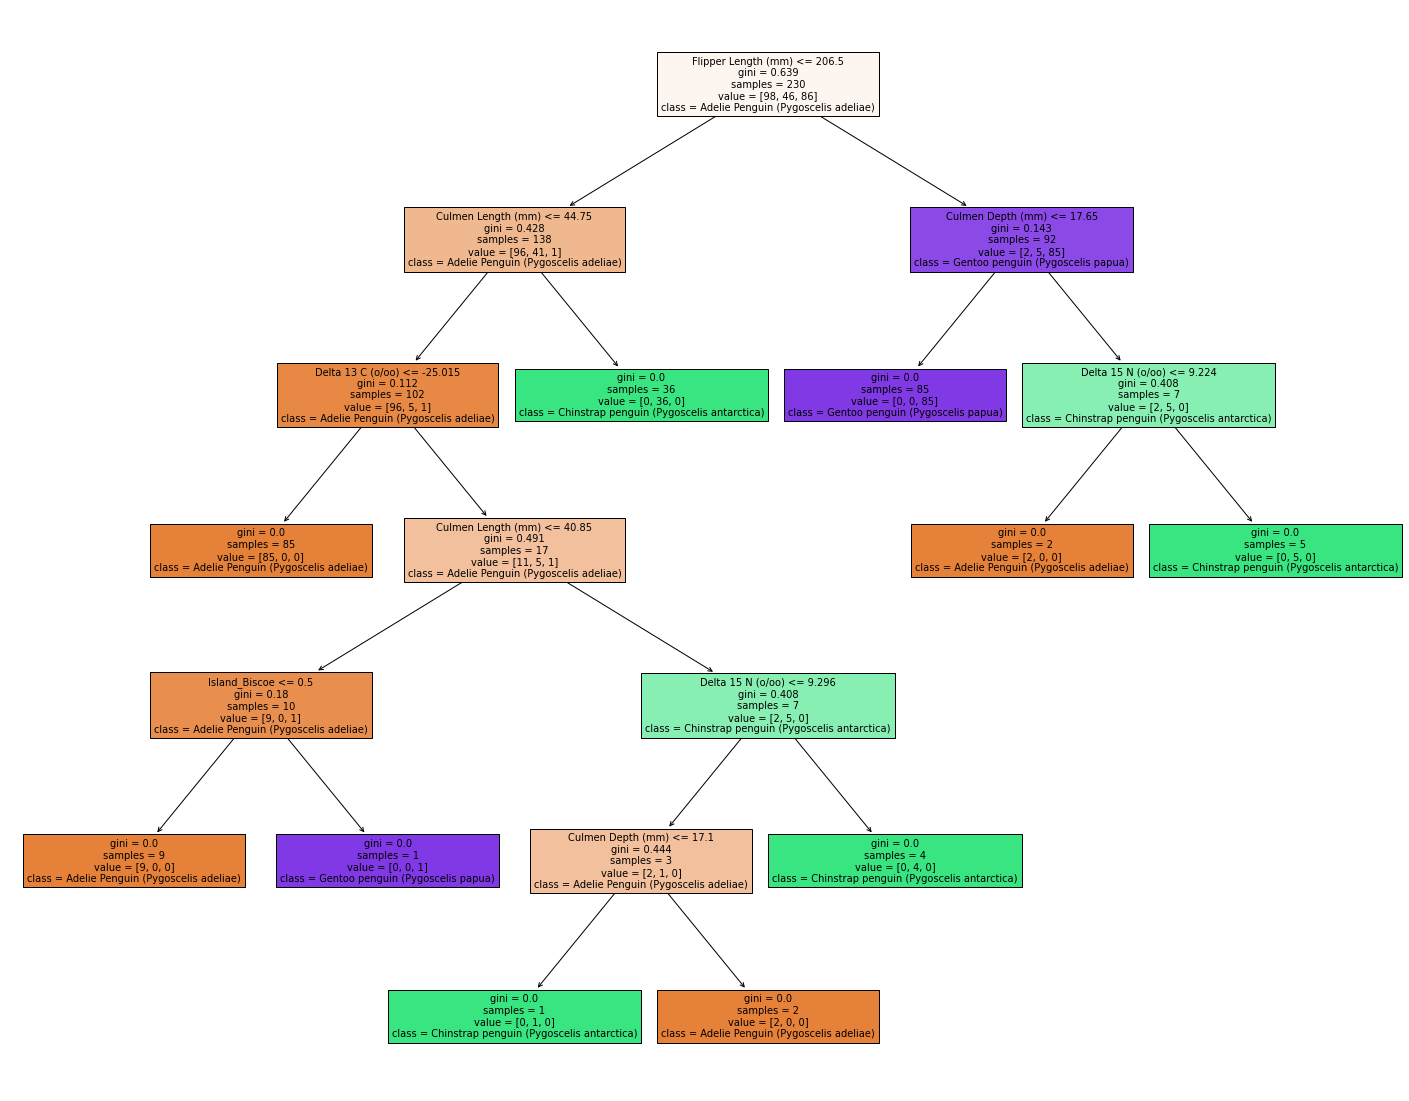

In [21]:
# Now we can heave a image explaining the same decisions previously described
# but we add tow new information, the name of the variable 
#and the gini value of each decision

#gini value represents how certain the model close that decision 
# brings the model close to the decision 

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names= clf.feature_names_in_,  
                   class_names=clf.classes_,
                   filled=True)

Text(0.5, 1.0, 'Feature Importance')

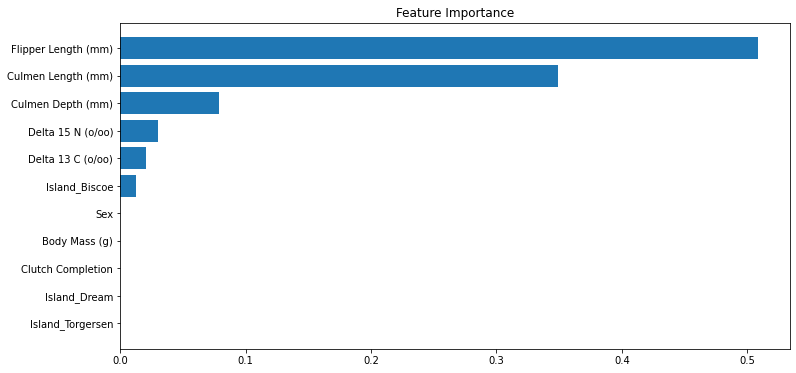

In [40]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Island_Torgersen'),
  Text(1, 0, 'Island_Dream'),
  Text(2, 0, 'Clutch Completion'),
  Text(3, 0, 'Body Mass (g)'),
  Text(4, 0, 'Sex'),
  Text(5, 0, 'Delta 15 N (o/oo)'),
  Text(6, 0, 'Island_Biscoe'),
  Text(7, 0, 'Delta 13 C (o/oo)'),
  Text(8, 0, 'Culmen Depth (mm)'),
  Text(9, 0, 'Culmen Length (mm)'),
  Text(10, 0, 'Flipper Length (mm)')])

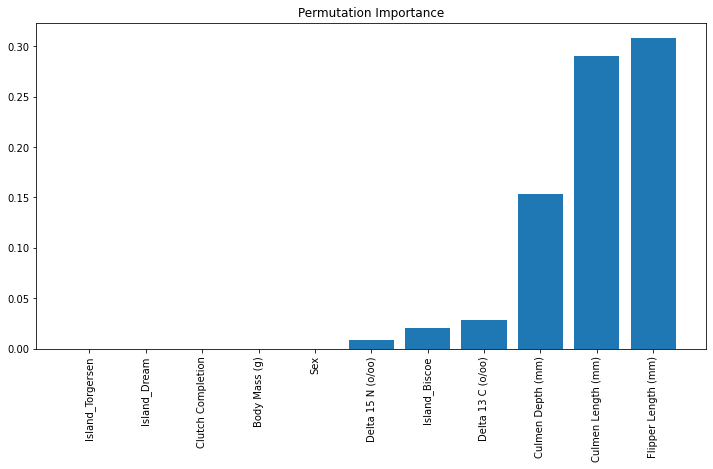

In [42]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(clf, x_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.xticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Permutation Importance')
plt.xticks(rotation = 90)

In [24]:
x_test.columns

Index(['Island', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

Apparently the model is taking the columns Culmen Length (mm),Culmen Depth (mm) and Flipper Length (mm) with more importance then the other variables and completely disconsidering Body Mass (g),Sex and island. 
with that in mind if we take this model to production, we could disconsider this variables in the input, so our module can work faster. 

# testing decision tree

In [25]:
# using the same data cling function to clean test data 
x_test = tratamento(x_test)

In [26]:
# Organizing the columns in the same order as the training data 
x_test = x_test.loc[:,x_train_tra.columns]
x_test.head()

,Island_Torgersen,Island_Biscoe,Island_Dream,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
194,0,0,1,1,50.9,19.1,196.0,3550.0,0,10.02372,-24.86594
157,0,0,1,1,45.2,17.8,198.0,3950.0,1,8.88942,-24.49433
225,0,1,0,1,46.5,13.5,210.0,4550.0,1,7.99530,-25.32829
208,0,0,1,1,45.2,16.6,191.0,3250.0,1,9.62357,-24.78984
318,0,1,0,1,48.4,14.4,203.0,4625.0,1,8.16582,-26.13971


In [27]:
y_pred = clf.predict(x_test)

at this point we need to validate the model so we will use a confusion matrix

/home/andre/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


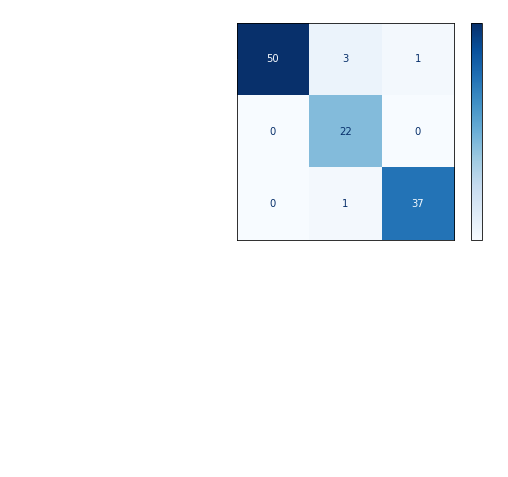

In [28]:

from sklearn import metrics 
color = 'white'
matrix = metrics.plot_confusion_matrix(clf, x_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.xticks(rotation=90)
plt.show()

In the confusion matrix we should see the highest values in the diagonal, as we see in this case. but we can allow take a look at some more specific metrics 

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.956140350877193
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      0.93      0.96        54
Chinstrap penguin (Pygoscelis antarctica)       0.85      1.00      0.92        22
        Gentoo penguin (Pygoscelis papua)       0.97      0.97      0.97        38

                                 accuracy                           0.96       114
                                macro avg       0.94      0.97      0.95       114
                             weighted avg       0.96      0.96      0.96       114



With the decision tree, we get an accuracy of 0,94, that means that 94% of the model predictions are correct. <br>
this first model is nice, but we can also test some other models to compare the results 

## Random Forest

Now we're going to tray random forest, this model utilizes the same logic as the decision tree, but instead of creating one we randomly sample our training data and create decision trees with these samples, creating a forest of random trees. With that, we select the one with the bast predictions of them all. 

In [30]:
# creating the model

from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(x_train_tra,y_train)

RandomForestClassifier()

In [31]:
# making predictions 
y_pred = rfc.predict(x_test)

In [32]:
#testing accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.9824561403508771
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      0.96      0.98        54
Chinstrap penguin (Pygoscelis antarctica)       0.96      1.00      0.98        22
        Gentoo penguin (Pygoscelis papua)       0.97      1.00      0.99        38

                                 accuracy                           0.98       114
                                macro avg       0.98      0.99      0.98       114
                             weighted avg       0.98      0.98      0.98       114



in this case we got a batter accuracy of 0.98 but we are too close to 100% or overfitting.

[Text(807.6315789473684, 1019.25, 'Island_Biscoe <= 0.5\ngini = 0.63\nsamples = 147\nvalue = [102, 42, 86]\nclass = Adelie Penguin (Pygoscelis adeliae)'),
 Text(513.9473684210526, 883.35, 'Delta 15 N (o/oo) <= 9.244\ngini = 0.472\nsamples = 72\nvalue = [68, 42, 0]\nclass = Adelie Penguin (Pygoscelis adeliae)'),
 Text(367.10526315789474, 747.45, 'Island_Torgersen <= 0.5\ngini = 0.254\nsamples = 44\nvalue = [57, 10, 0]\nclass = Adelie Penguin (Pygoscelis adeliae)'),
 Text(293.6842105263158, 611.55, 'Flipper Length (mm) <= 196.5\ngini = 0.375\nsamples = 27\nvalue = [30, 10, 0]\nclass = Adelie Penguin (Pygoscelis adeliae)'),
 Text(146.8421052631579, 475.65, 'Delta 13 C (o/oo) <= -24.92\ngini = 0.291\nsamples = 21\nvalue = [28, 6, 0]\nclass = Adelie Penguin (Pygoscelis adeliae)'),
 Text(73.42105263157895, 339.75, 'gini = 0.0\nsamples = 15\nvalue = [24, 0, 0]\nclass = Adelie Penguin (Pygoscelis adeliae)'),
 Text(220.26315789473682, 339.75, 'Sex <= 0.5\ngini = 0.48\nsamples = 6\nvalue = [4, 6

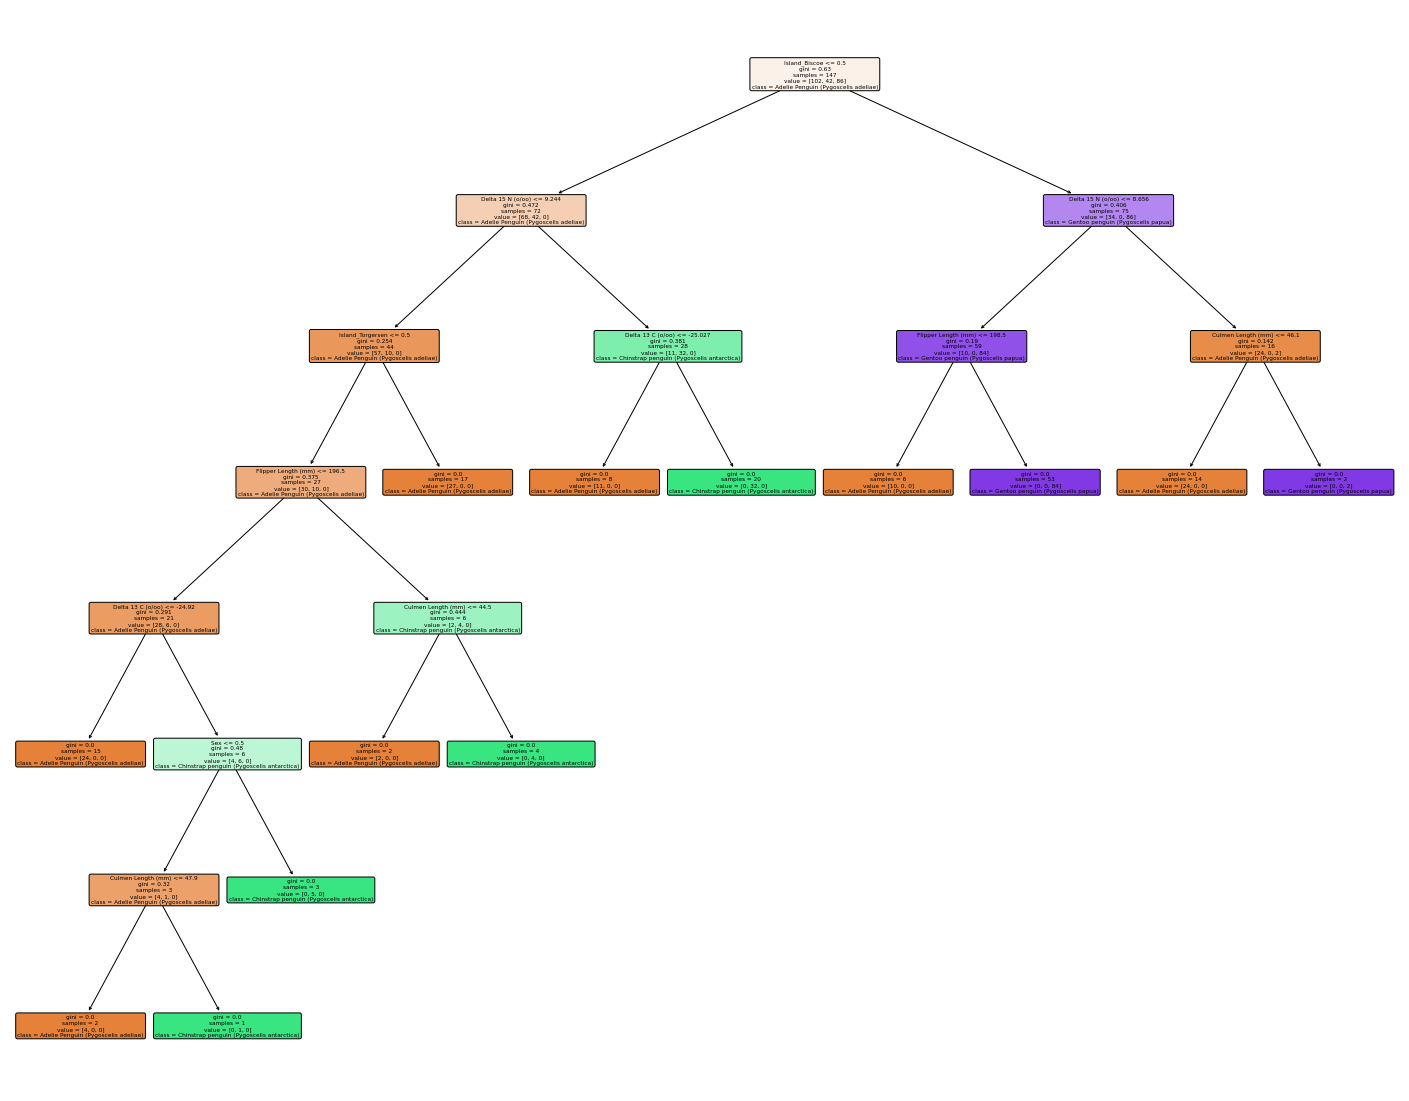

In [33]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
plot_tree(rfc.estimators_[0], 
          feature_names=rfc.feature_names_in_,
          class_names=rfc.classes_, 
          filled=True, impurity=True, 
          rounded=True)

In [34]:
import time
import numpy as np

start_time = time.time()
importances = rfc.feature_importances_
std = np.std([rfc.feature_importances_ for tree in rfc.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 1.282 seconds


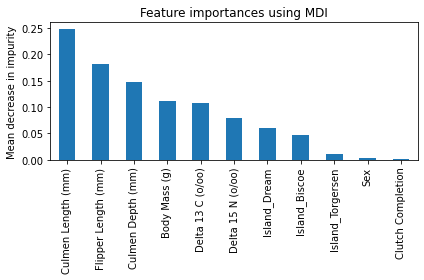

In [35]:

import pandas as pd

forest_importances = pd.Series(importances, index=rfc.feature_names_in_).sort_values(ascending=False)



fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [36]:
forest_importances.head()

Culmen Length (mm)     0.248271
Flipper Length (mm)    0.182461
Culmen Depth (mm)      0.148475
Body Mass (g)          0.111596
Delta 13 C (o/oo)      0.107191
dtype: float64

In [37]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rfc, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=rfc.feature_names_in_)

Elapsed time to compute the importances: 2.678 seconds


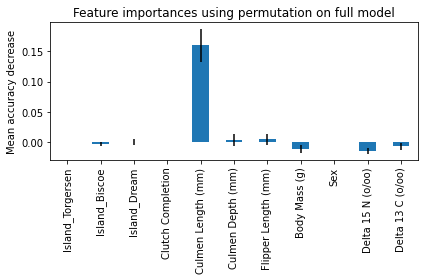

In [38]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

It is interesting to find that the random forest model gives importance to different features of our data. Here the model looks first to body mass, folded bay delta 15 and delta 13. On the other hand, the decision tree gives importance to flipper length and Cullen length. 

## conclusion: 
considering that the random forest accuracy is 0.98 and the decision tree is 0.96 we should consider using the random forest model. 
Besides that, for more efficiency in running it, we should discard sex and the islands features from the data. 